# <center><span style="color:rgb(75,104,184)">Évaluation d'un apprentissage et méthodes d'optimisation</span></center>
## <center><span style="color:rgb(75,104,184)">Partie : méthodes d'optimisation</span></center>

## <center><span style="color:rgb(75,104,184)">M1 Informatique - Contrôle Continu - 2023/2024</span></center>


### <span style="color:rgb(75,104,184)">Consignes :</span>

- Ce TP est noté, et ça sera la note sur la partie méthodes d'optimisation pour le cours "évaluation d'un apprentissage et méthodes d'optimisation".

- Ce TP comporte des questions théoriques ainsi que des questions pratiques visant à implémenter en Python des algorithmes d'optimisation abordés en cours. Les réponses aux questions théoriques peuvent être fournies par écrit sur une feuille en précisant votre nom, prénom et numéro d'étudiant, ou incluses comme texte dans le notebook. Il n'est pas nécessaire d'utiliser du code LaTeX pour rédiger les réponses.

- Le TP est à rendre à la fin de la séance dans le dépôt (TP Noté : méthodes d'optimisation) sur la page Ecampus. Les envois par mail ne sont pas autorisés.

- Mettez ici votre
    - Numéro étudiant :
    - Nom :
    - Prénom :


### <span style="color:rgb(75,104,184)">Exercice 1 :</span>

Nous considérons dans cet exercice une fonction de perte pseudo-Huber (lissée) définie par :
$$
\begin{array}{ll}
p :  \mathbb{R} \rightarrow \mathbb{R}\\
p(z) := \sqrt{1 + z^2} - 1
\end{array}
$$

On peut montrer que la fonction p est deux fois différentiable.

**Questions:**

1. Pour tout $z \in R$, donner ses dérivées d'ordre 1 et d'ordre 2, sachant que $(\sqrt{u})' = \frac{u'}{2 u}$  et $(\frac{u}{v})' = \frac{u'v - uv'}{v^2}$.
2. Justifier que la fonction p est convexe. Que dire de ses minima locaux ?
3. Montrer que  $\text{argmin}_{z \in \mathbb{R}}\quad p(z) = \{0\}$




### <span style="color:rgb(75,104,184)">Exercice 2 :</span>

Nous considérons un problème de *régression logistique* qui vise à prédire une étiquette (label) binaire à partir d'un modèle linéaire : il va ainsi s'agir de prédire $y_i \in \{-1,1\}$ au moyen de $\mathbf{x}_i^T \mathbf{w}$ (ou plutôt de son signe) pour tout $i$. 

Le problème d'optimisation associé est le suivant :
$$
    \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} \phi(w) 
    := \frac{1}{n} \sum_{i=1}^n \log(1+\exp(-y_i \mathbf{x}_i^T \mathbf{w}))+\frac{\lambda}{2}\|\mathbf{w}\|^2,
$$
où chaque $y_i$ est un label dans $\{-1,1\}$ et le second terme de l'objectif est utilisé pour "convexifier" le problème.

On peut montrer que la fonction objectif de ce problème est de classe $\mathcal{C}^2$. Le gradient de la fonction $f$ est donné par
$$
    \nabla \phi(\mathbf{w}) = - \frac{1}{n} \sum_{i=1}^n\frac{y_i}{1 + \exp(y_i \mathbf{x}_i^T \mathbf{w})} \mathbf{x}_i + \lambda \mathbf{w}
$$
pour tout $\mathbf{w} \in \mathbb{R}^d$. Ce gradient est $L_{\phi}$-lipschitzien avec
$$
    L_{\phi}=\frac{\|\mathbf{X}^T \mathbf{X}\|}{4n}+\lambda.
$$
La matrice Hessienne de $\phi$ est quant à elle donnée par
$$
    \nabla^2 \phi(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \frac{\exp(y_i \mathbf{x}_i^T \mathbf{w})}{(1+\exp(y_i \mathbf{x}_i^T \mathbf{w}))^2}\mathbf{x}_i \mathbf{x}_i^T + \lambda \mathbf{I}_d.
$$

Le code suivant permet de charger les données à partir desquelles nous rechercherons notre modèle de prédiction. 

In [19]:
# Importation des librairies
import matplotlib.pyplot as plt
from math import sqrt # Racine carrée
import sys
import numpy as np
from numpy.random import randn 
from scipy.linalg import norm

# chagement de données
X = np.genfromtxt('instances.csv', delimiter=';')
y = np.genfromtxt('labels.csv', delimiter=';')
y = np.sign(y) # Logarithme pour classification binaire

d = X.shape[1] # number of features (dimension)
n = X.shape[0] # number of instances (observations)
idx = np.arange(d)
lbda = 1. / n ** (0.5)



Nous souhaitons utiliser l'algorithme généralisé de la décente de gradient qui a été implémenté dans les séances passées pour minimiser la fonction objectif ci-dessus.

**Réalisation 1.1 :**

Préparer la classe *RegPb* pour utiliser la méthode de la descente du gradient.


In [20]:
# Classe Python pour problèmes de régression
class RegPb(object):
    '''
        Classe implémentant des problèmes de régression basés sur des modèles linéaires
        
        Attributes:
            X: Matrice d'attributs (features)
            y: Vecteurs de labels
            n,d: Dimensions de X en utilisant shape 
            lbda: Paramètre de "convexification"
                
    '''
   
    # Classe instanciée
    def __init__(self, X, y,lbda):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.lbda = lbda
        
    
    # Fonction objectif
    def fun(self, w):
        fun = (np.log(1 + np.exp(-self.y * np.dot(self.X, w))).mean()) + ((1/2) * self.lbda * norm(w) ** 2)
        return fun
    
    # Gradient
    def grad(self, w):
        grad = -(1/self.n) * np.sum((self.y / (1 + np.exp(self.y * np.dot(self.X, w))))[:, np.newaxis] * self.X, axis=0) + (self.lbda * w)
        return grad

    # Constante de Lipschitz pour le gradient
    def lipgrad(self):
        L = (norm(self.X.T @ self.X) / (4 * self.n)) + self.lbda
        return L

**Réalisation 1.2 :**

Génèrer alors une instance de régression logistique  en utilisant la classe définie précédement. 

In [21]:
pblogreg = RegPb(X, y, lbda)

**Réalisation 2 : Implémentation de la Descente de gradient**

On rappelle que l'algorithme de descente de gradient appliqué à une fonction différentiable $f$ est donné par un point initial $\mathbf{w}_0$ ainsi que par l'itération
$$
\mathbf{w}_{k+1} = \mathbf{w}_k - \alpha_k \nabla f(\mathbf{w}_k) \quad \forall k \ge 0.
$$

On se concentrera sur la descente de gradient avec 
1. un pas constant égal à $\tfrac{1}{L}$, avec $L$ la constante de Lipschitz pour $\nabla f$ calculée plus haut.
2. Une recherche linéaire pour trouver le pas garantissant la décroissance de la fonction objectif pour chaque itération.

On peut déterminer une longueur de pas via une recherche linéaire. Une technique classique dite d'Armijo consiste à tester un ensemble décroissant de valeurs jusqu'à en trouver une qui garantisse la décroissance de la fonction objectif. On va ici chercher $\alpha_k=\alpha*(1/2)^{j_k}$, où $\alpha>0$ est le pas initial et  $j_k$ est le plus petit entier non négatif tel que
$$
f\left(\mathbf{w}_k-\frac{1}{2^{j_k}}\alpha \nabla f(\mathbf{w}_k)\right) < f(w_k) - 0.0001 \frac{1}{2^{j_k}} \alpha\|\nabla f(\mathbf{w}_k)\|^2.
$$
est vérifiée. Si $\mathbf{w}_k$ n'est pas un minimum local, la condition est vérifiée pour tout $\alpha_k < \frac{1}{2 L}$.

**Réalisation 2.1**

Implémenter l'algorithme de la Decente de Gradient en utilisant une stratégie avec un pas constant de Lipschitz.

**Réalisation 2.2**

Intégrer dans la Decente de Gradient implémentée dans 2.1 une stratégie où on utilise une recherche linéaire pour trouver le pas de l'itération courante comme décrit ci-dessus. Dans la boucle de recherche, on vérifie que la valeur courante est strictement superieure à 1e-10 pour arrêter la recheche dans le cas où on a des erreurs de précision. Le pas initial pour la recherche linéaire est fixé à 2.


In [23]:
def grad_desc(w0, problem, stepchoice=0, step0=1, n_iter=1000, verbose=False):
    """
    Descente de gradient
        
    Arguments:
        w0: Vecteur initial
        problem: Structure représentant le problème
        stepchoice: Stratégie pour la longueur de pas
            0: Constante égale à 1/L
            -1: Recherche linéaire
        step0: Longueur de pas initiale pour la recherche linéaire
        n_iter: Nombre maximum d'itérations
        verbose: Affichage détaillé ou non
    
    Renvoie:
        w_output: Itéré final de la méthode
        objvals: Historique des valeurs de fonctions
        ngvals: Historique des normes de gradient
    """

    # Initialisation
    objvals = []
    ngvals = []
    
    # Initialisation
    w = w0.copy()
    obj = problem.fun(w)
    g = problem.grad(w)
    ng = norm(g)

    objvals.append(obj)
    ngvals.append(ng)

    # Affichage des valeurs initiales
    if verbose:
        print("Descente de gradient :")
        print(' | '.join([name.center(8) for name in ["iter", "fval", "ngrad"]]))
        print(' | '.join([("%d" % 0).rjust(8), ("%.2e" % obj).rjust(8), ("%.2e" % ng).rjust(8)]))

    # Boucle principale de descente de gradient
    for k in range(1, n_iter + 1):
        
        if stepchoice == 0:  # Pas constant égal à 1/L
            
            alpha = 1 / problem.lipgrad()
            
        elif stepchoice == -1:  # Recherche linéaire
            alpha = step0
            j = 0
            
            while problem.fun(w - (alpha * g)) >= (obj - (0.0001 * alpha * ng ** 2)):
                alpha *= 0.5
                j += 1
                if alpha < 1e-10:
                    break
        else:
            raise ValueError("Invalid stepchoice value.")

        w -= alpha * g
        obj = problem.fun(w)
        g = problem.grad(w)
        ng = norm(g)

        objvals.append(obj)
        ngvals.append(ng)

        # Affichage des informations à chaque itération
        if verbose:
            print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8), ("%.2e" % ng).rjust(8)]))

    # Informations de sortie
    w_output = w.copy()
    
    return w_output, np.array(objvals), np.array(ngvals)

**Réalisation 3.1**

Lancer la méthode implémentée en utilisant les deux stratégies sur le problème généré en commençant la recherche avec un vecteur de poids initial null, 100 itérations, et un pas initial pour la recherche linéaire égale 1.

In [24]:
# Vecteur de poids initial nul
w0 = np.zeros(d)

# Stratégie avec pas constant égal à 1/L
w_a, obj_a, ngrad_a = grad_desc(w0, pblogreg, stepchoice=0, n_iter=100)

# Stratégie avec recherche linéaire
w_d, obj_d, ngrad_d = grad_desc(w0, pblogreg, stepchoice=-1, step0=1, n_iter=100)

print("Fonction objectif finale pour GD - 1/L",obj_a[-1])
print("Fonction objectif finale pour GD - Rech. lin.",obj_d[-1])

print(len(ngrad_a), len(ngrad_d))

Fonction objectif finale pour GD - 1/L 0.4063600433667559
Fonction objectif finale pour GD - Rech. lin. 0.40635537862706866
101 101


In [66]:
## Garder Resultat pour verification
"""
Fonction objectif finale pour GD - 1/L 0.4063553776941591
Fonction objectif finale pour GD - Rech. lin. 0.40635537769415914
101 101
"""

Fonction objectif finale pour GD - 1/L 0.4063553776941591
Fonction objectif finale pour GD - Rech. lin. 0.40635537769415914
101 101


**Réalisation 3.2**

1. Lancer le code suivant pour afficher les courbes en utilisant les deux stratégies.
2. Analyser les graphiques en expliquant le(s) résultat(s) trouvé(s).
3. Changer le pas initial à {1.5, 2, 2.5} dans la stratégie utilisant la recherche linéaire et expliquer les résultats trouvés.

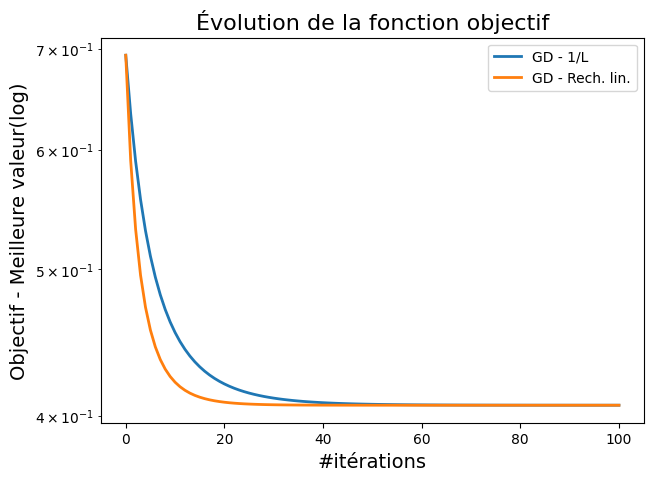

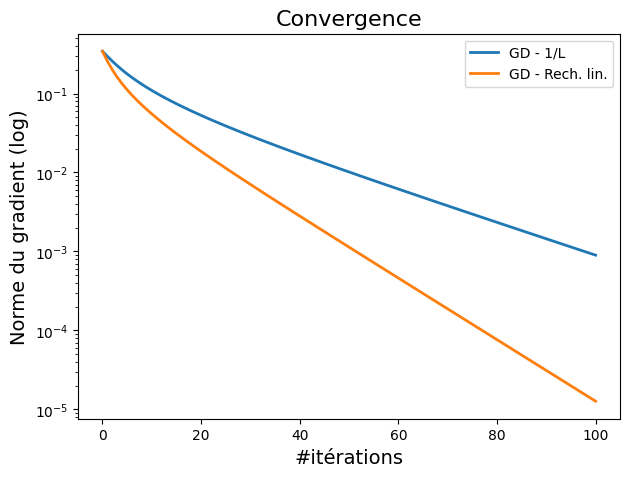

In [18]:
vmin = 0

# En termes de fonction objectif 
plt.figure(figsize=(7, 5))
plt.semilogy(obj_a-vmin, label="GD - 1/L", lw=2)
plt.semilogy(obj_d-vmin, label="GD - Rech. lin.", lw=2)
plt.title("Évolution de la fonction objectif", fontsize=16)
plt.xlabel("#itérations", fontsize=14)
plt.ylabel("Objectif - Meilleure valeur(log)", fontsize=14)
plt.legend()


# En termes de norme de gradient
plt.figure(figsize=(7, 5))
plt.semilogy(ngrad_a, label="GD - 1/L", lw=2)
plt.semilogy(ngrad_d, label="GD - Rech. lin.", lw=2)
plt.title("Convergence", fontsize=16)
plt.xlabel("#itérations", fontsize=14)
plt.ylabel("Norme du gradient (log)", fontsize=14)
plt.legend()

In [29]:
# Stratégie avec recherche linéaire et différents pas initiaux
w_d_1_5, obj_d_1_5, ngrad_d_1_5 = grad_desc(w0, pblogreg, stepchoice=-1, step0=1.5, n_iter=100)
w_d_2, obj_d_2, ngrad_d_2 = grad_desc(w0, pblogreg, stepchoice=-1, step0=2, n_iter=100)
w_d_2_5, obj_d_2_5, ngrad_d_2_5 = grad_desc(w0, pblogreg, stepchoice=-1, step0=2.5, n_iter=100)

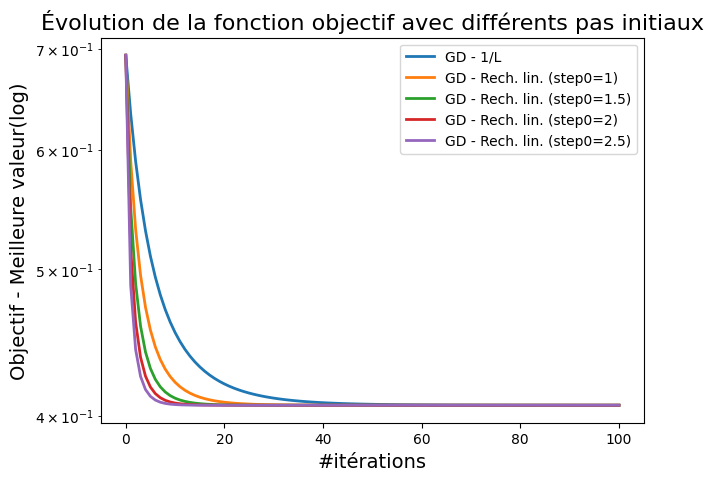

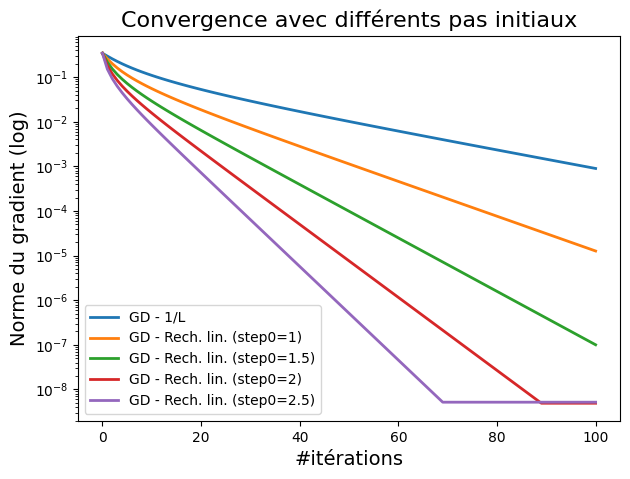

In [30]:
# En termes de fonction objectif avec différents pas initiaux
plt.figure(figsize=(7, 5))
plt.semilogy(obj_a-vmin, label="GD - 1/L", lw=2)
plt.semilogy(obj_d-vmin, label="GD - Rech. lin. (step0=1)", lw=2)
plt.semilogy(obj_d_1_5-vmin, label="GD - Rech. lin. (step0=1.5)", lw=2)
plt.semilogy(obj_d_2-vmin, label="GD - Rech. lin. (step0=2)", lw=2)
plt.semilogy(obj_d_2_5-vmin, label="GD - Rech. lin. (step0=2.5)", lw=2)
plt.title("Évolution de la fonction objectif avec différents pas initiaux", fontsize=16)
plt.xlabel("#itérations", fontsize=14)
plt.ylabel("Objectif - Meilleure valeur(log)", fontsize=14)
plt.legend()

# En termes de norme de gradient avec différents pas initiaux
plt.figure(figsize=(7, 5))
plt.semilogy(ngrad_a, label="GD - 1/L", lw=2)
plt.semilogy(ngrad_d, label="GD - Rech. lin. (step0=1)", lw=2)
plt.semilogy(ngrad_d_1_5, label="GD - Rech. lin. (step0=1.5)", lw=2)
plt.semilogy(ngrad_d_2, label="GD - Rech. lin. (step0=2)", lw=2)
plt.semilogy(ngrad_d_2_5, label="GD - Rech. lin. (step0=2.5)", lw=2)
plt.title("Convergence avec différents pas initiaux", fontsize=16)
plt.xlabel("#itérations", fontsize=14)
plt.ylabel("Norme du gradient (log)", fontsize=14)
plt.legend()